In [0]:
#Accuracy of the model
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Reading Dataset
dataset1= pd.read_csv('Melbourne_housing_FULL.csv')
dataset1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [11]:
#Columns Data Types in the Dataset
dataset1.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [12]:
#Shape of Dataset
dataset1.shape

(34857, 21)

In [13]:
#Number of null values 
dataset1.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [0]:
#Droping all null values
dataset1.dropna(inplace=True)


In [16]:
#Checking the null values
dataset1.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [17]:
#A detailed description of the datset
dataset1.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,8887,8887,8887.000000,8887,8.887000e+03,8887,8887,8887,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887,8887.000000,8887.000000,8887,8887.000000
unique,315,8764,NaN,3,NaN,5,250,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,36 Aberfeldie St,NaN,h,NaN,S,Nelson,24/02/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,194,3,NaN,6625,NaN,5602,986,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,810,NaN,NaN,2707,NaN
mean,NaN,NaN,3.098909,NaN,1.092902e+06,NaN,NaN,NaN,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,NaN,-37.804501,144.991393,NaN,7475.940137
std,NaN,NaN,0.963786,NaN,6.793819e+05,NaN,NaN,NaN,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,NaN,0.090549,0.118919,NaN,4375.024364
min,NaN,NaN,1.000000,NaN,1.310000e+05,NaN,NaN,NaN,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.174360,144.423790,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.410000e+05,NaN,NaN,NaN,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,NaN,-37.858560,144.920000,NaN,4382.500000
50%,NaN,NaN,3.000000,NaN,9.000000e+05,NaN,NaN,NaN,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,NaN,-37.798700,144.998500,NaN,6567.000000
75%,NaN,NaN,4.000000,NaN,1.345000e+06,NaN,NaN,NaN,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,NaN,-37.748945,145.064560,NaN,10331.000000


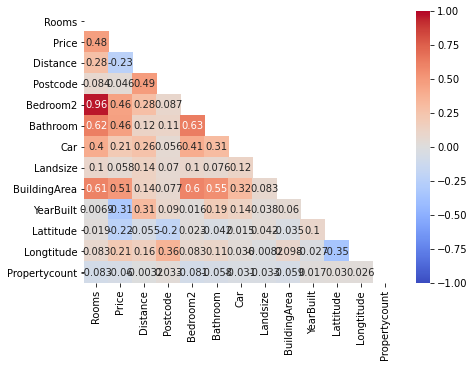

In [26]:
#Finding Correlation between variables
corr = dataset1.corr()
plt.subplots(figsize=(7,5))
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True, mask = mask)

In [0]:
#Droping highly correlated features
data = dataset1.drop(columns=['Bedroom2'])

In [0]:
#Label encoding the all the categorical feautures
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['Suburb', 'Type','Date','Method','Postcode','SellerG','Regionname','Address','CouncilArea']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [0]:
#Checking the categorical features
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,0,3922,2,0,1035000.0,1,22,62,2.5,52,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
4,0,6458,3,0,1465000.0,3,22,63,2.5,52,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
6,0,6960,4,0,1600000.0,4,147,64,2.5,52,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0
11,0,1374,3,0,1876000.0,1,147,69,2.5,52,2.0,0.0,245.0,210.0,1910.0,31,-37.8024,144.9993,2,4019.0
14,0,8740,2,0,1636000.0,1,147,74,2.5,52,1.0,2.0,256.0,107.0,1890.0,31,-37.8060,144.9954,2,4019.0


In [0]:
#Calculating Z score for detecting outliners
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[1.73111781 0.18233325 1.14026379 ... 0.01687393 0.84306828 0.7901978 ]
 [1.73111781 0.82011601 0.10263075 ... 0.02528345 0.84306828 0.7901978 ]
 [1.73111781 1.01855037 0.9350023  ... 0.02276059 0.84306828 0.7901978 ]
 ...
 [1.75194993 0.00938122 1.14026379 ... 0.86730363 1.10793695 0.21325427]
 [1.75194993 1.00018322 1.14026379 ... 0.94887603 1.10793695 0.21325427]
 [1.75194993 0.09515862 1.14026379 ... 0.82315361 1.10793695 0.21325427]]


In [0]:
#Positions of Outliers
print(np.where(z > 3))

(array([  31,   35,   41, ..., 8858, 8867, 8879]), array([ 2, 11, 11, ...,  8, 11, 11]))


In [0]:
#removing all Outliers
data1 = data[(z < 3).all(axis=1)]

In [0]:
#To see the information we lost
data1.shape

(7938, 20)

In [0]:
#Slicing dataset into Independent(X) and Target(y) varibles
X = data1.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].values
y = data1.iloc[:, 4].values


array([[0.0000000e+00, 3.9220000e+03, 2.0000000e+00, ..., 1.4499340e+02,
        2.0000000e+00, 4.0190000e+03],
       [0.0000000e+00, 6.4580000e+03, 3.0000000e+00, ..., 1.4499440e+02,
        2.0000000e+00, 4.0190000e+03],
       [0.0000000e+00, 6.9600000e+03, 4.0000000e+00, ..., 1.4499410e+02,
        2.0000000e+00, 4.0190000e+03],
       ...,
       [3.1400000e+02, 4.4070000e+03, 2.0000000e+00, ..., 1.4488826e+02,
        6.0000000e+00, 6.5430000e+03],
       [3.1400000e+02, 1.8530000e+03, 2.0000000e+00, ..., 1.4487856e+02,
        6.0000000e+00, 6.5430000e+03],
       [3.1400000e+02, 4.6240000e+03, 2.0000000e+00, ..., 1.4489351e+02,
        6.0000000e+00, 6.5430000e+03]])

In [0]:
#Dividing dataset into test and train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
print(X_train.shape)
print(y_train.shape)

(5556, 19)
(5556, 1)


In [0]:
#Performing Recursive Feauture Elimation with Cross Validation
#Using Random forest for RFE-CV and r2 square as scoring

from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
clf_rf=RandomForestRegressor()
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='r2')
rfecv=rfecv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#Optimal Features
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 17
Best features : Int64Index([0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18], dtype='int64')


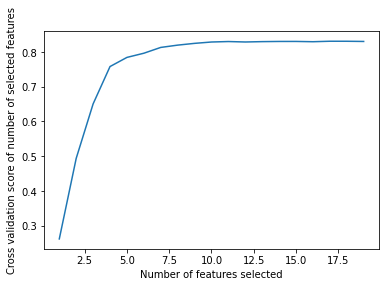

In [0]:
#r2 square vs Number of features
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [0]:
#Feature ranking
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]*100))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Feature ranking:
1. feature 12 (30.977903)
2. feature 7 (16.695442)
3. feature 13 (12.802571)
4. feature 8 (12.457822)
5. feature 15 (4.538164)
6. feature 11 (4.348680)
7. feature 16 (3.757320)
8. feature 3 (2.595830)
9. feature 14 (2.287582)
10. feature 2 (1.814548)
11. feature 1 (1.508952)
12. feature 18 (1.313721)
13. feature 6 (1.206161)
14. feature 0 (0.997666)
15. feature 5 (0.932729)
16. feature 9 (0.661466)
17. feature 10 (0.461689)
18. feature 4 (0.380468)
19. feature 17 (0.261287)


In [0]:
#Selecting the Important Features
opt_feat = list((X_train.columns[rfecv.support_]))
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_opt = X_train.iloc[:,opt_feat]
X_test = X_test.iloc[:,opt_feat]

In [0]:
#Training the Random Forest Classifer on Train data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_opt, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting the Test data
y_pred = regressor.predict(X_test)

In [0]:
#Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 209657.11060506917
Mean Squared Error: 82274420365.31076
Root Mean Squared Error: 286835.17979026


In [0]:
#R-Squared
print("r square :", regressor.score(X_test, y_test)*100)

r square 71.96686799548215
